# **Task 2] Perform data cleaning and exploratory data analysis (EDA)on a dataset of your choice. Explore the relationships between variables and identify patterns and trends in the data**

**Load Packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [3]:
Sales_data=pd.read_csv(r'/content/dataset.csv')
Sales_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


**Find missing values and dealing with them**

In [4]:
missing_values=Sales_data.isnull().sum()
missing_values

,0
CustomerID,0
Gender,0
Age,0
Income,5
City,3
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


In [5]:

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(Sales_data[['Income']])
Sales_data['Income']=imputer.fit_transform(Sales_data[['Income']])


In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="most_frequent")
imputer.fit(Sales_data[['City']])
Sales_data['City']=imputer.fit_transform(Sales_data[['City']]).ravel()

In [7]:
missing_values=Sales_data.isnull().sum()
missing_values

,0
CustomerID,0
Gender,0
Age,0
Income,0
City,0
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


**Identifying incorrect datatype and assigning correct datatype**

In [8]:
Sales_data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


In [9]:
Sales_data['Date_of_Purchase']=Sales_data['Date_of_Purchase'].astype('datetime64[ns]')

In [10]:
Sales_data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


**Dataset size**

In [11]:
Sales_data.shape

(81, 12)

**Dealing with duplicates values**

In [12]:
duplicates=Sales_data.duplicated()
Sales_data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No


In [13]:
Sales_data.drop_duplicates(inplace=True)

In [14]:
duplicates=Sales_data.duplicated()
Sales_data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status


**Dealing with Inconsistent data**

In [46]:
inconsistent_data=Sales_data['Customer_Lifespan_Months'].unique()
inconsistent_data

array(['3', '4', '1', '2', '5', 'XXXX'], dtype=object)

In [49]:
Sales_data=Sales_data[Sales_data['Customer_Lifespan_Months']!='XXXX']

In [50]:
inconsistent_data=Sales_data['Customer_Lifespan_Months'].unique()
inconsistent_data

array(['3', '4', '1', '2', '5'], dtype=object)

# **Exploratory Analysis**

**Frequency Analysis of Gender**

In [51]:
frequency_Gender=Sales_data['Gender'].value_counts()
frequency_Gender

,count
Gender,
Female,43
Male,36


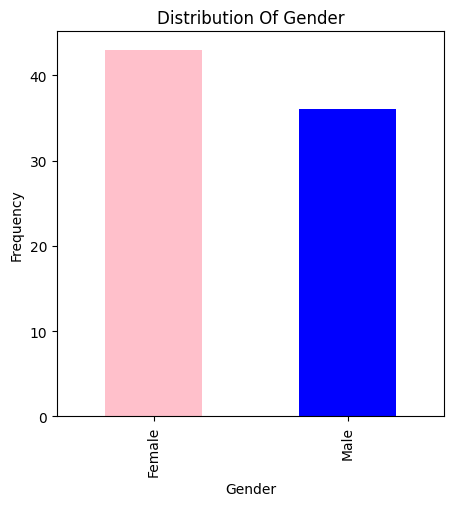

In [52]:
plt.figure(figsize=(5,5))
frequency_Gender.plot(kind='bar',color=['pink','blue'])
plt.title('Distribution Of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

**Percentage Analysis of Gender**

In [53]:
percentage_Gender=frequency_Gender/len(Sales_data['Gender'])*100
percentage_Gender


,count
Gender,
Female,54.43038
Male,45.56962


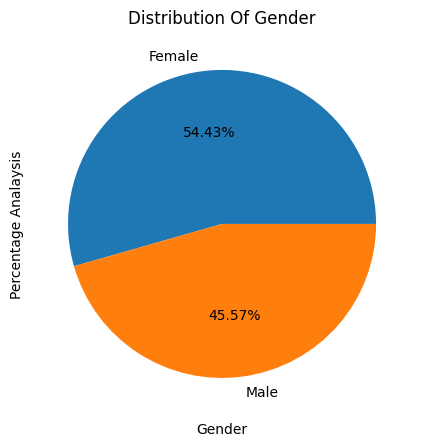

In [54]:
plt.figure(figsize=(5,5))
percentage_Gender.plot(kind='pie',autopct='%1.2F%%')
plt.title('Distribution Of Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage Analaysis')
plt.show()

**Distribution of Purchase Channel across various cities**

In [55]:
cross_tab=pd.crosstab(Sales_data['City'],Sales_data['Purchase_Channel'])
cross_tab


Purchase_Channel,In-store,Online
City,,
Chicago,4,10
Houston,9,18
Los Angeles,8,13
New York,6,11


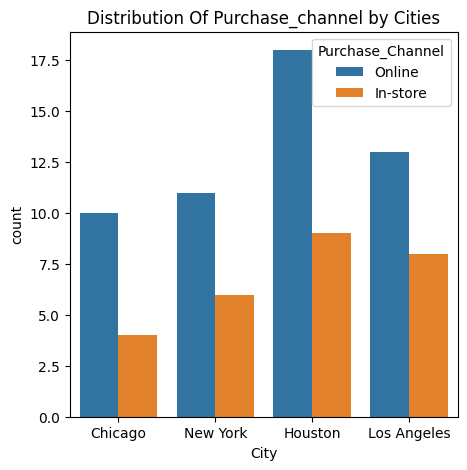

In [56]:

plt.figure(figsize=(5,5))
# cross_tab.plot(kind='bar',stacked=True)
sns.countplot(x='City',hue='Purchase_Channel',data=Sales_data)
plt.title('Distribution Of Purchase_channel by Cities')
plt.xlabel('City')
plt.ylabel('count')
plt.show()

**Frequency of Purchases on their footedness**

In [57]:
Group_var=Sales_data.groupby('Region')['Frequency_of_Purchases'].mean()
round(Group_var,2)

,Frequency_of_Purchases
Region,
Midwest,8.88
Northeast,8.88
West,9.75


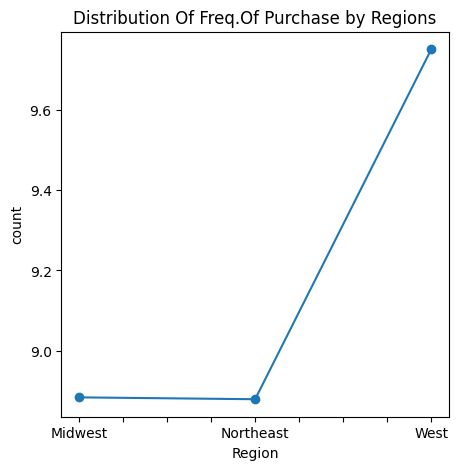

In [58]:

plt.figure(figsize=(5,5))
Group_var.plot(kind='line',marker='o')
plt.title('Distribution Of Freq.Of Purchase by Regions')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()





**Distribution of Churn status by Gender**

In [59]:
cross_tab_churn_status=pd.crosstab(Sales_data['Gender'],Sales_data['Churn_Status'])
cross_tab_churn_status

Churn_Status,No,Yes
Gender,,
Female,22,21
Male,17,19


<Figure size 500x500 with 0 Axes>

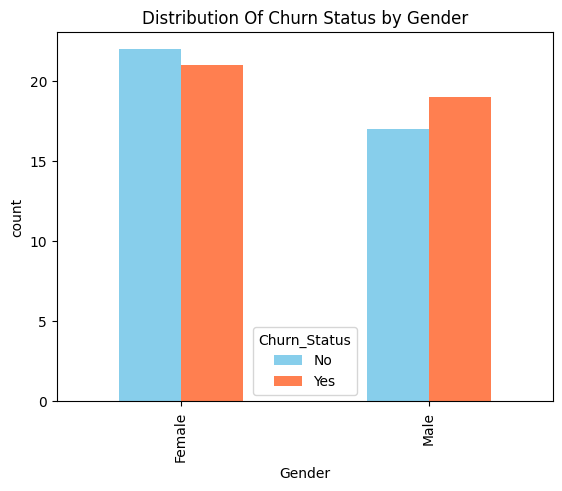

In [60]:

plt.figure(figsize=(5,5))
cross_tab_churn_status.plot(kind='bar',color=['skyblue','coral'],stacked=False)
plt.title('Distribution Of Churn Status by Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

**Distribution of Age Vs Income**

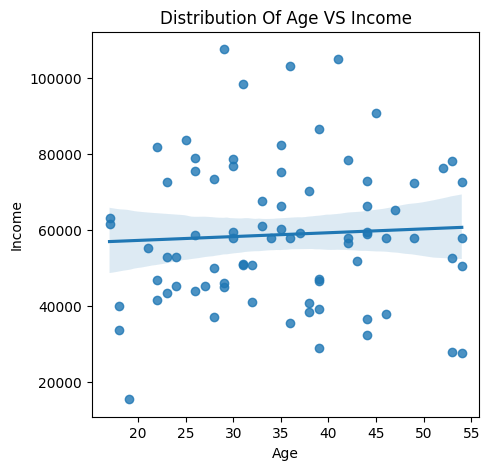

In [61]:
plt.figure(figsize=(5,5))
# plt.scatter(Sales_data['Age'],Sales_data['Income'])
sns.regplot(x='Age',y='Income',data=Sales_data)
plt.title('Distribution Of Age VS Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [62]:

Sales_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'City', 'Region',
       'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Purchase_Channel', 'Date_of_Purchase',
       'Churn_Status'],
      dtype='object')

**Finding Numeric variables**

In [63]:
num_variables=Sales_data.select_dtypes(include=['int64','float64'])
num_variables

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount
0,49,72504.0,10,9.824100e+01
1,38,40881.0,15,1.576400e+02
2,17,63333.0,1,4.125200e+01
3,34,58030.0,6,6.732900e+01
4,30,78889.0,3,5.276300e+01
...,...,...,...,...
74,42,58033.0,4,5.798400e+01
75,44,59659.0,14,1.345400e+02
77,30,76887.0,7,8.081600e+01
78,42,56569.0,11,1.342341e+07


**Correlation matrix using heatmap**

In [64]:
num_variables=Sales_data.select_dtypes(include=['int64','float64'])
correl=num_variables.corr()
correl

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount
Age,1.000000,0.054776,0.309257,0.076508
Income,0.054776,1.000000,0.025697,-0.013805
Frequency_of_Purchases,0.309257,0.025697,1.000000,0.063629
Average_Purchase_Amount,0.076508,-0.013805,0.063629,1.000000


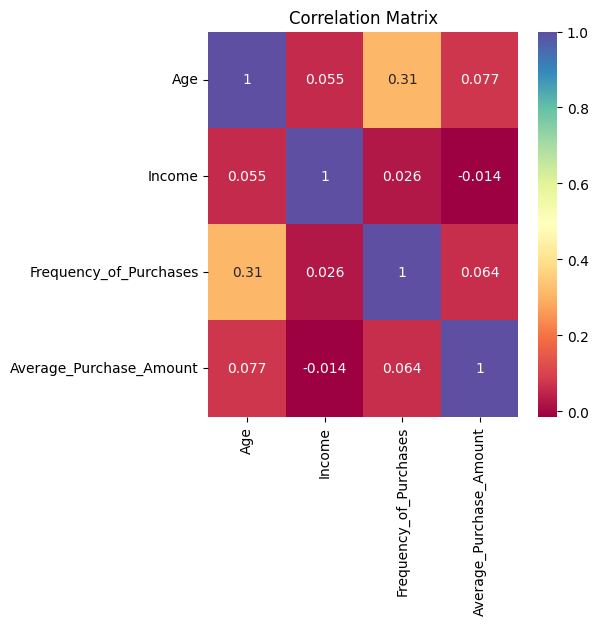

In [65]:

plt.figure(figsize=(5,5))
sns.heatmap(correl,annot=True,cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

**Distribution of Income by Gender**

In [66]:
Group_var1=Sales_data.groupby('Gender')['Income'].mean()
round(Group_var1,2)

,Income
Gender,
Female,59652.44
Male,57916.86


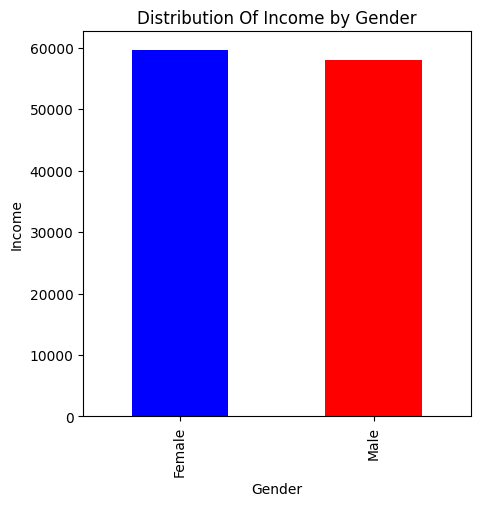

In [67]:
plt.figure(figsize=(5,5))
Group_var1.plot(kind='bar',color=['blue','red'])
plt.title('Distribution Of Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

**Descriptive Analysis**

In [68]:
round(Sales_data.describe(),2)

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Date_of_Purchase
count,79.00,79.00,79.00,79.00,79
mean,35.11,58861.54,9.19,170014.01,2023-01-11 09:06:50.126582272
min,17.00,15531.00,1.00,41.25,2022-01-02 00:00:00
25%,27.50,45223.50,7.00,77.49,2022-07-28 12:00:00
50%,35.00,58033.00,10.00,96.55,2022-12-29 00:00:00
75%,43.50,72751.00,12.00,123.14,2023-07-09 12:00:00
max,54.00,107662.00,16.00,13423411.96,2023-12-29 00:00:00
std,10.26,18922.15,3.24,1510240.74,NaN


**Dealing with outlier**

In [69]:
Sales_dataset=Sales_data[Sales_data['Average_Purchase_Amount']!=13423411.96]
Sales_dataset.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [70]:
round(Sales_dataset.describe(),2)

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Date_of_Purchase
count,78.00,78.00,78.00,78.00,78
mean,35.03,58890.94,9.17,98.66,2023-01-11 19:41:32.307692288
min,17.00,15531.00,1.00,41.25,2022-01-02 00:00:00
25%,27.25,45215.75,7.00,77.16,2022-07-28 06:00:00
50%,35.00,58033.00,9.50,96.51,2023-01-14 00:00:00
75%,43.75,72776.50,12.00,121.28,2023-07-10 06:00:00
max,54.00,107662.00,16.00,193.05,2023-12-29 00:00:00
std,10.29,19042.81,3.26,29.24,NaN


In [71]:
df_cleaned = Sales_data.dropna(axis=0)


In [72]:
df_cleaned.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


**Distribution Of Customer_Lifespan_Months by Age**

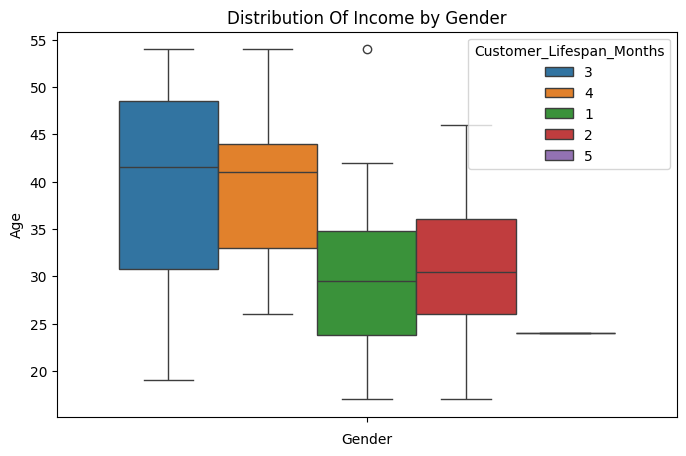

In [86]:
plt.figure(figsize=(8,5))
sns.boxplot(hue='Customer_Lifespan_Months',y='Age',data=Sales_dataset,palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Distribution Of Customer_Lifespan_Months by Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()